# TASK 1 - Preprossesing

# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import LabelEncoder

from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import umap

from sklearn.mixture import GaussianMixture
import pickle

from sklearn.neighbors import KernelDensity

## Load Data

Experiment name is "Candidate Markers for Stratification and Classification in Rheumatoid Arthritis"

In [3]:
df = pd.read_csv("OriginalDATA/cell_data.csv")

#### Describe the data

In [5]:
df.describe()

,id,147Sm_CD20,170Er_CD3,145Nd_CD4,146Nd_CD8a,169Tm_CD45RA,176Yb_CD56,148Nd_CD16,160Gd_CD14,209Bi_CD61,159Tb_CD11c,151Eu_CD123,174Yb_HLA-DR
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,20.500000,1.073468,116.271099,14.639330,66.670004,66.684355,13.640194,0.615643,5.192223,19.048998,22.129879,1.062339,50.680512
std,11.543404,5.936403,106.678886,18.799092,180.168175,125.044656,56.379110,28.811915,19.059464,94.467067,70.376650,8.299414,155.846586
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.750000,0.000000,1.120000,0.000000,0.000000,0.173000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.500000,0.000000,111.492996,2.341000,1.950000,10.310500,0.113000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.250000,0.000000,187.085007,28.261000,17.820250,79.428001,3.141000,0.000000,0.000000,0.550000,2.037000,0.000000,5.742000
max,40.000000,1214.081055,1029.688965,2010.024048,29092.410156,4418.207031,2399.028076,23780.710938,805.767029,26540.960938,2219.047119,529.825989,16141.110352


- Data consists of 20000 cells for 20 deceased and 20 controll patienss.
- Each cell has is characterized by 12 cell markers. (will get adjusted)
- No missing data.
- There are a lot of zeros in out measurements, which is expected. Out of the 20000 cells a person has, relativly few of the cells get the markers attached to them. And even fewer would be detected by flow cytometry. This suggests that the variables should be scaled differently. Scaling using arcsinh(x/5) has been used successfully.

# Definitions:
- **diseased** a person who is sick
- **control** a person who is assumed not sick
- **patient** both a *diseased* and a *control* person

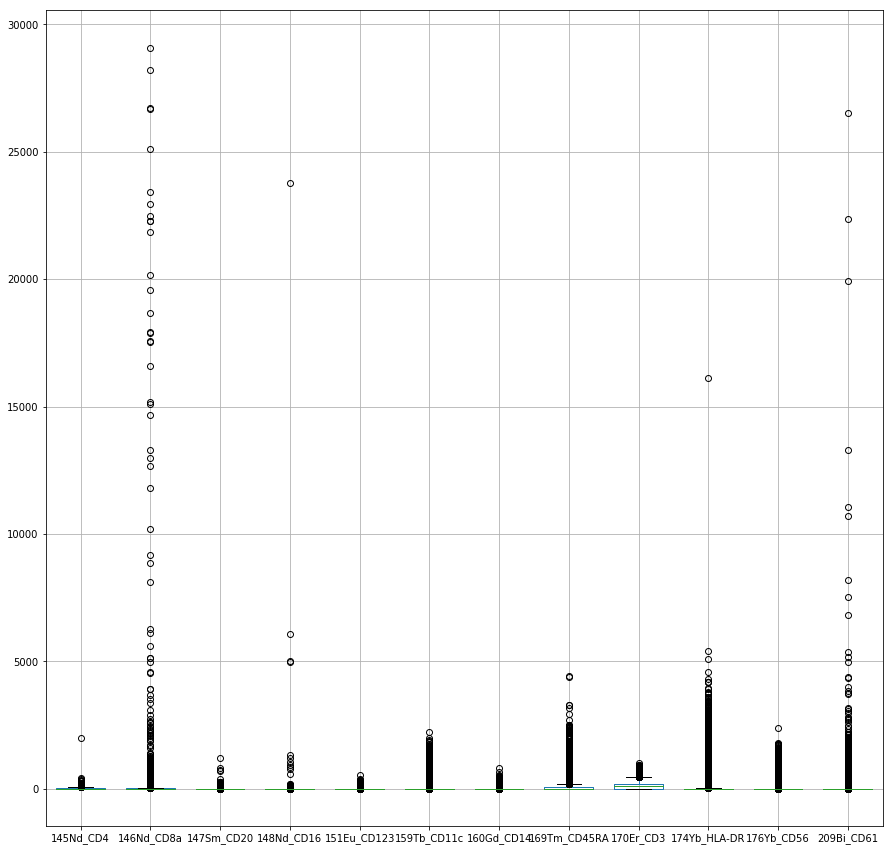

In [13]:
df[df.columns.difference(["id","group"])].boxplot(figsize=(15,15), widths=.7)

### Standardize the data

In [4]:
def scale_df(df):
    df_sub = df[df.columns.difference(["id","group"])]
    raw_scaled_df = df_sub.transform(lambda x: np.arcsinh(x/5))
    df_scaled = raw_scaled_df.copy()
    df_scaled["id"] = df.id
    df_scaled["group"] = df.group
    return df_scaled

In [5]:
df_scaled = scale_df(df)

### Save scaled as csv

In [6]:
df_scaled.to_csv("ModifiedDATA/scaled_ra.csv", index=False)

#### Describe the scaled data

In [8]:
df_scaled.describe()

,145Nd_CD4,146Nd_CD8a,147Sm_CD20,148Nd_CD16,151Eu_CD123,159Tb_CD11c,160Gd_CD14,169Tm_CD45RA,170Er_CD3,174Yb_HLA-DR,176Yb_CD56,209Bi_CD61,id
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,1.150588,1.333476,0.118680,0.085666,0.095650,0.671779,0.307882,1.880021,2.817956,0.984007,0.604480,0.485726,20.500000
std,1.220329,1.838250,0.419028,0.282540,0.385329,1.359591,0.853568,1.754079,1.905254,1.686048,1.114777,1.217038,11.543404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034593,0.222168,0.000000,0.000000,0.000000,10.750000
50%,0.452590,0.380735,0.000000,0.000000,0.000000,0.000000,0.000000,1.471067,3.798173,0.000000,0.022598,0.000000,20.500000
75%,2.432927,1.983169,0.000000,0.000000,0.000000,0.396897,0.000000,3.459549,4.315451,0.982516,0.592855,0.109779,30.250000
max,6.689613,9.361942,6.185456,9.160339,5.356280,6.788544,5.775514,7.477199,6.020727,8.772834,6.866529,9.270154,40.000000


#### Plot of the scaled data

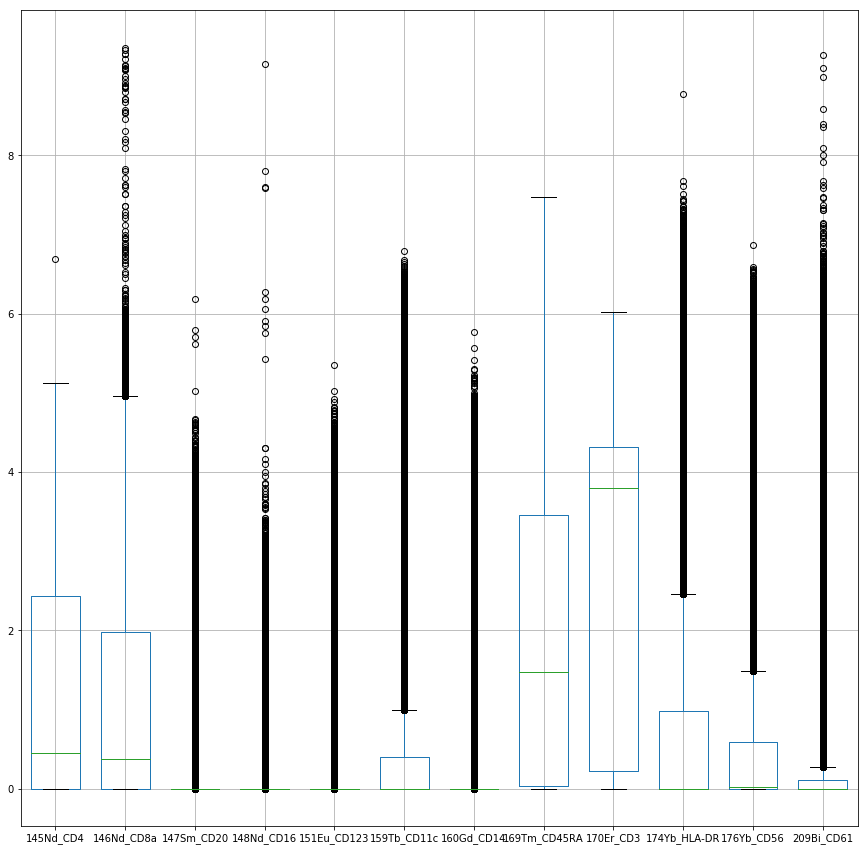

In [5]:
df_scaled[df_scaled.columns.difference(["id","group"])].boxplot(figsize=(15,15), widths=.7)

### Univarite density estimation

In [3]:
def plot_univarite_density(df, number_of_columns = 4, number_of_rows = 3):
    plt.figure(figsize = (3*number_of_columns,6*number_of_rows) )
    for i in range(0,len(df.columns.values)):
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.distplot(df[df.columns.values[i]], kde=True)

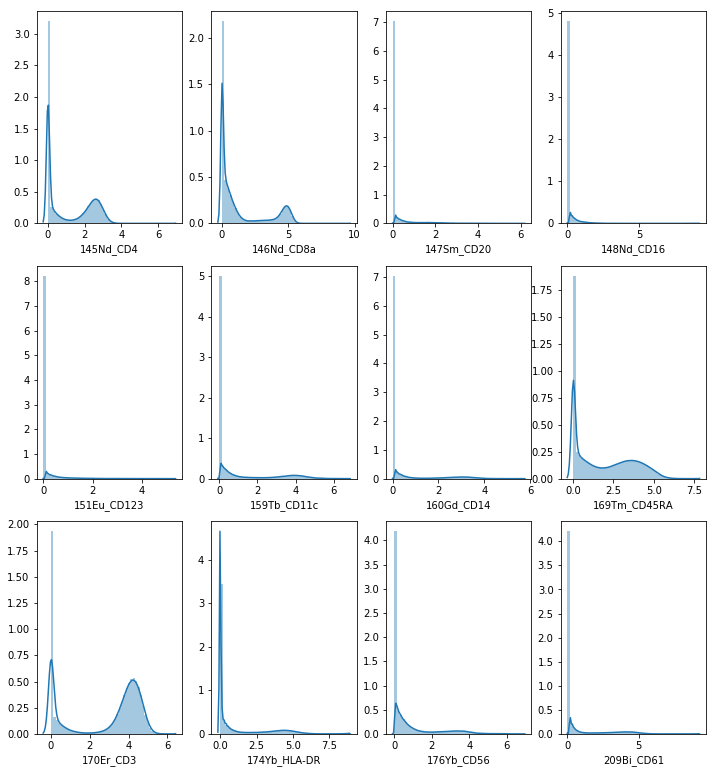

In [8]:
plot_univarite_density(df = df_scaled[df_scaled.columns.difference(["id","group"])])

### Correlation matrix

In [11]:
def plot_correlation_matrix(df):
    # calculate the correlation matrix
    corr = df.corr()
    plt.figure(figsize= (12,12))
    # plot the heatmap
    ax = sns.heatmap(corr, 
            xticklabels=df.columns,
            yticklabels=df.columns,
               annot=True,
               vmin=-1,
               vmax=1,
                cmap="RdBu")
    # fixes issue in matplotlib 3.1.1 that first and last rows are clipped in half
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

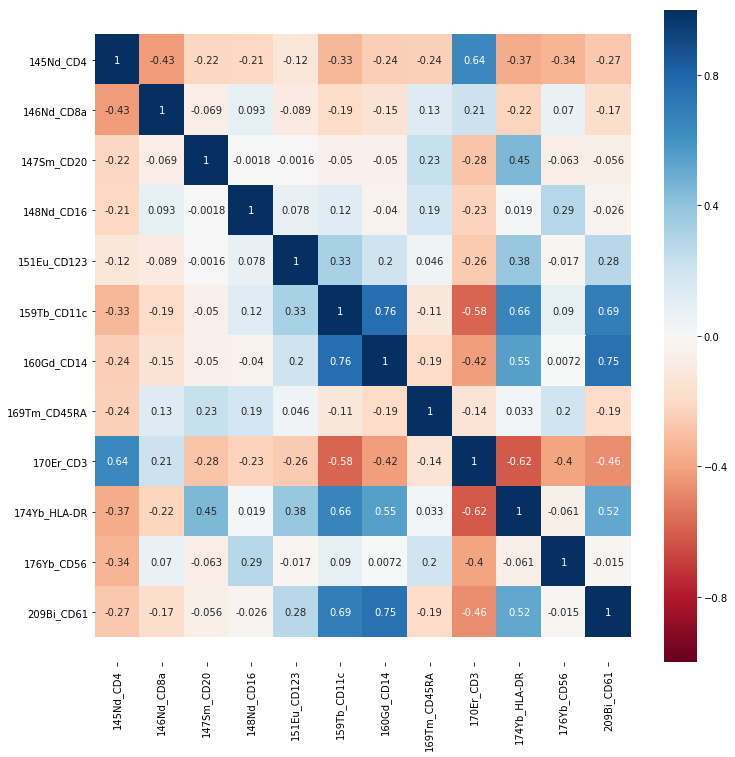

In [12]:
plot_correlation_matrix(df = df_scaled[df_scaled.columns.difference(["id","group"])])

### Pairplot

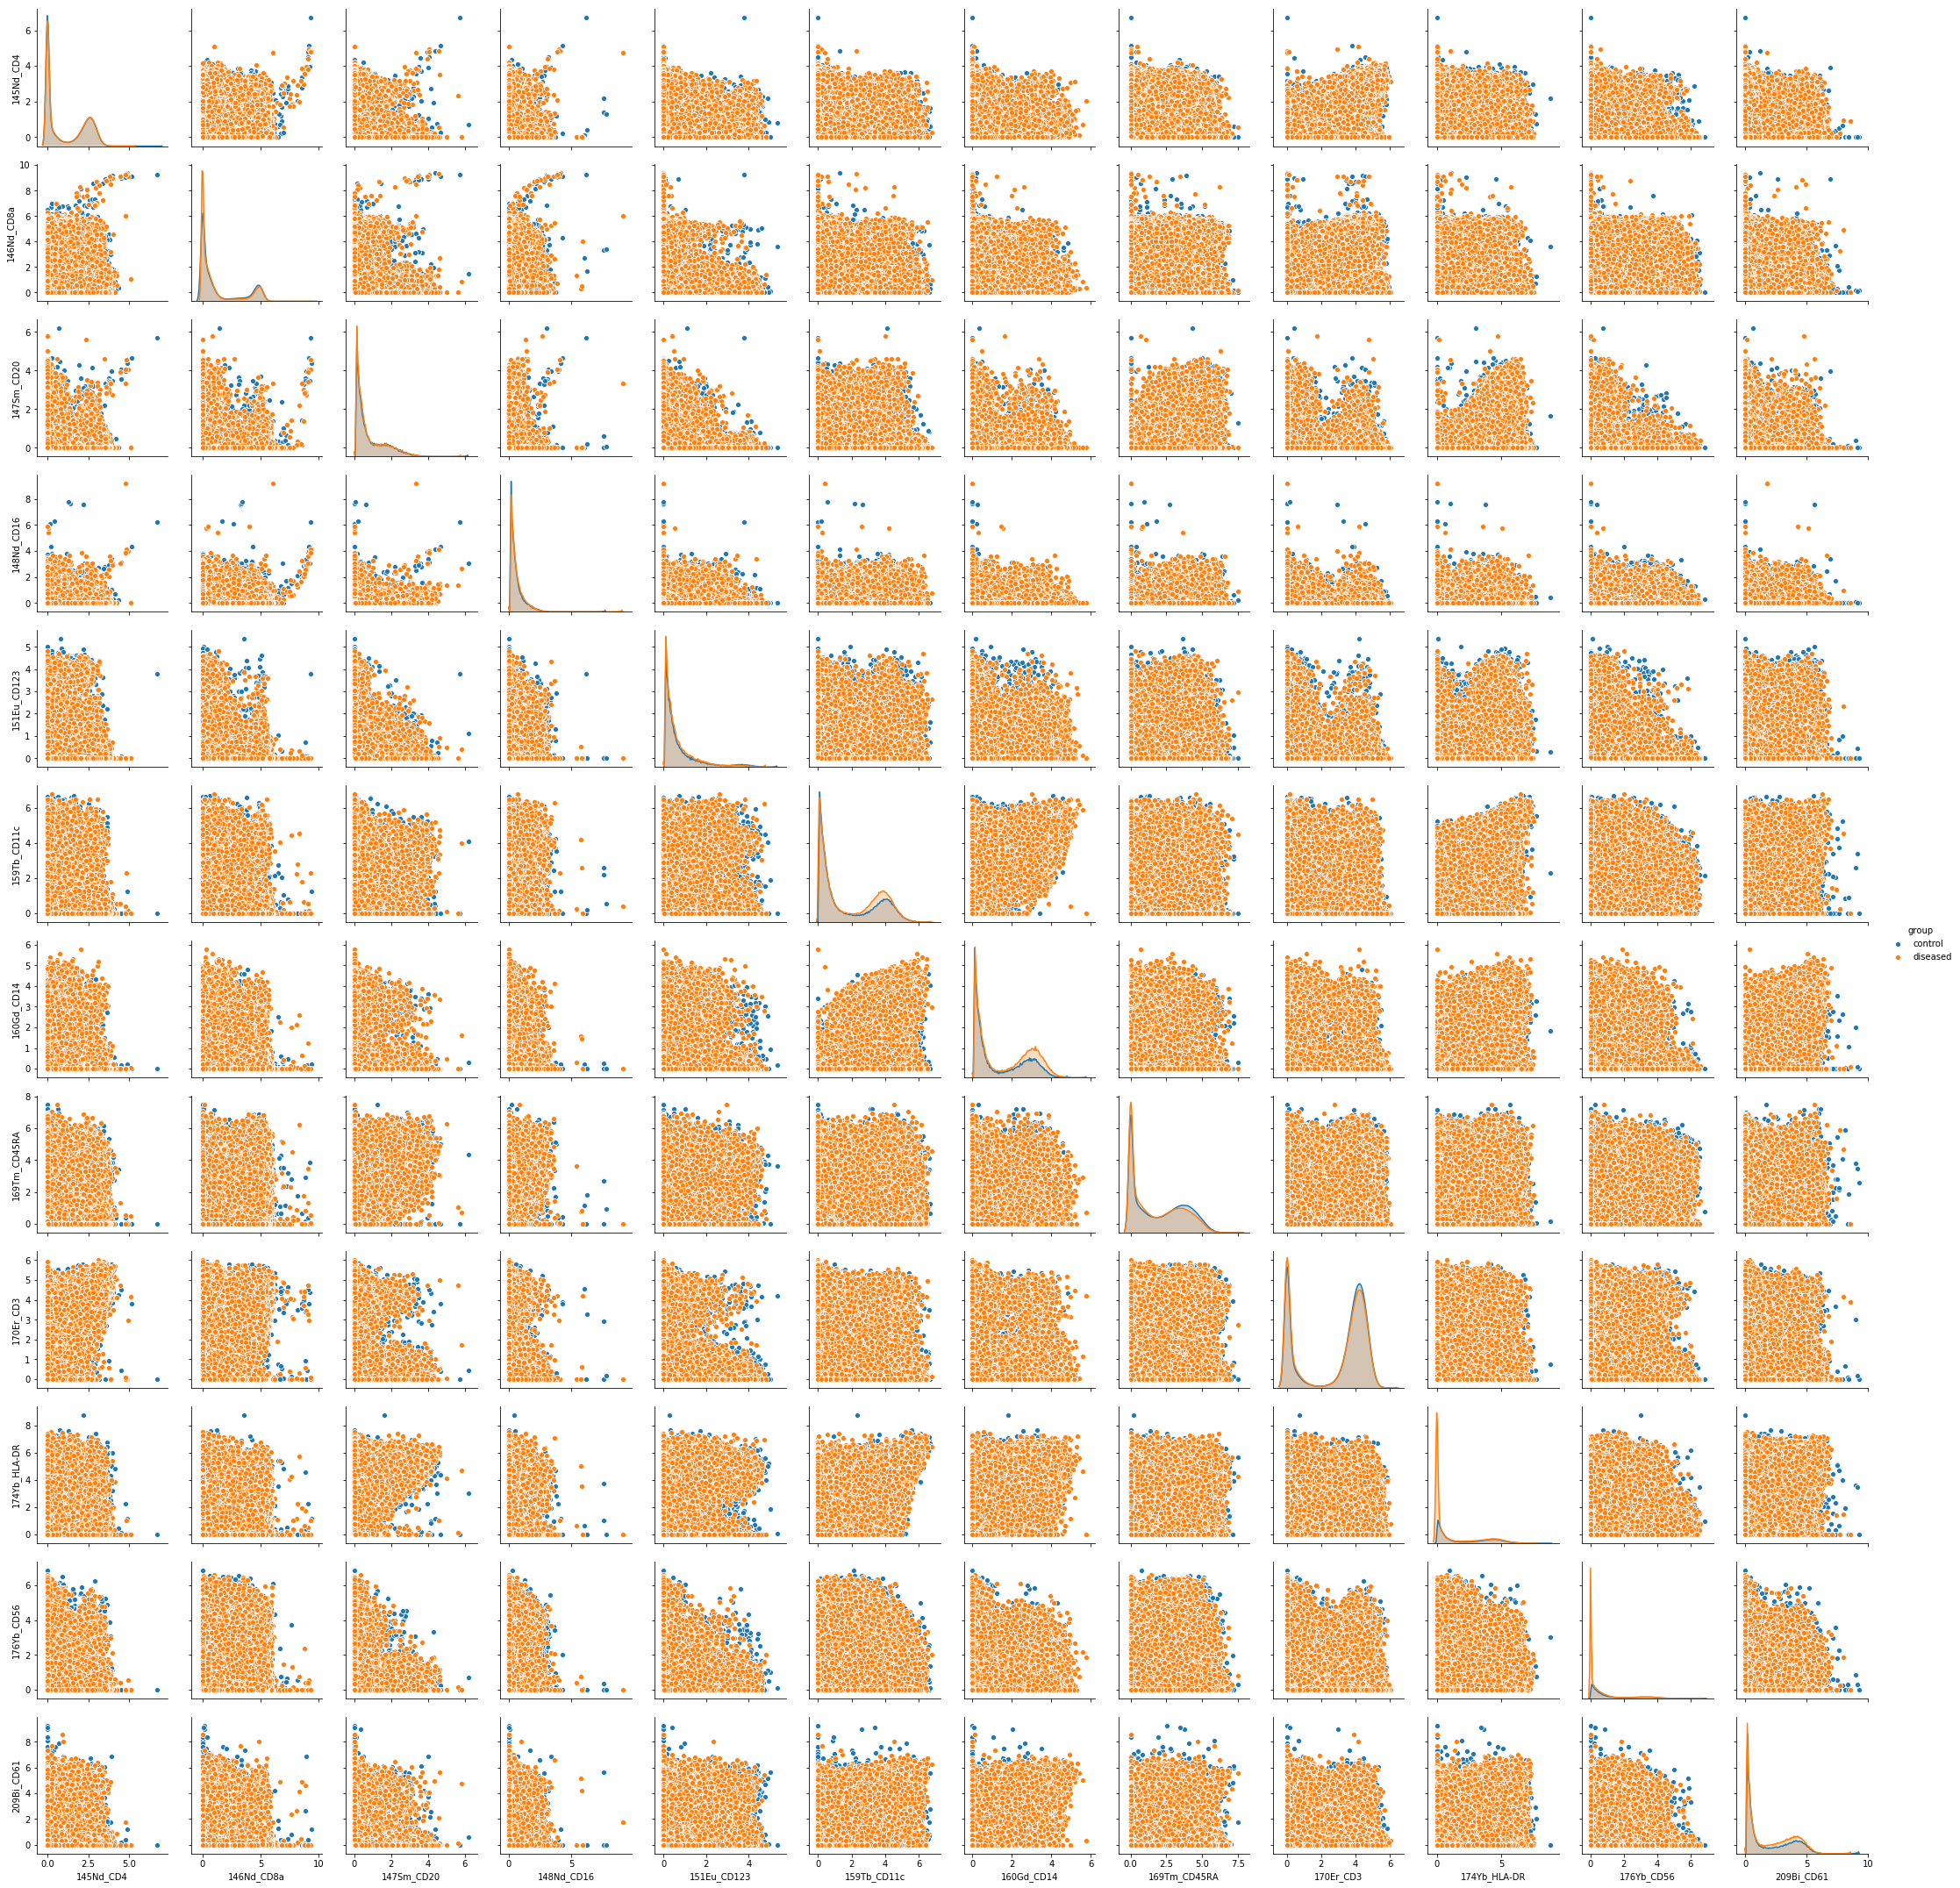

In [13]:
pairplot_group = sns.pairplot(df_scaled[df_scaled.columns.difference(["id"])], hue="group")